<a href="https://colab.research.google.com/github/wel51x/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [13]:
# TODO

import pandas as pd

data_url = ('https://archive.ics.uci.edu/ml/machine-learning-databases/'
            'haberman/haberman.data')
cols = [
   'Year of Operation',
   'Age',
   'Positive Nodes',
   'Survived 5 Years'
]

df = pd.read_csv(data_url, header=None, names=cols)

# make Year of Operation sane
df['Year of Operation'] += 1900

# make data fix: 0 for not surviving and 1 for surviving 5 years or longer
df['Survived 5 Years'] -= 2
df['Survived 5 Years'] = df['Survived 5 Years'].abs()

print("Data Frame shape: ", df.shape)
print("\nData has missing values: ", df.isnull().values.any())
print("\nData Frame description:\n",df.describe())
print("\nFirst five rows of Data Frame:")
df.head()


Data Frame shape:  (306, 4)

Data has missing values:  False

Data Frame description:
        Year of Operation         Age  Positive Nodes  Survived 5 Years
count         306.000000  306.000000      306.000000        306.000000
mean         1952.457516   62.852941        4.026144          0.735294
std            10.803452    3.249405        7.189654          0.441899
min          1930.000000   58.000000        0.000000          0.000000
25%          1944.000000   60.000000        0.000000          0.000000
50%          1952.000000   63.000000        1.000000          1.000000
75%          1960.750000   65.750000        4.000000          1.000000
max          1983.000000   69.000000       52.000000          1.000000

First five rows of Data Frame:


,Year of Operation,Age,Positive Nodes,Survived 5 Years
0,1930,64,1,1
1,1930,62,3,1
2,1930,65,0,1
3,1931,59,2,1
4,1931,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [23]:
# TODO
df_corr_table = df.corr()
print("Correlation Statistics:\n")
df_corr_table

Correlation Statistics:



,Year of Operation,Age,Positive Nodes,Survived 5 Years
Year of Operation,1.000000,0.089529,-0.063176,-0.067950
Age,0.089529,1.000000,-0.003764,0.004768
Positive Nodes,-0.063176,-0.003764,1.000000,-0.286768
Survived 5 Years,-0.067950,0.004768,-0.286768,1.000000


In [26]:
positive_nodes_bins = pd.cut(df['Positive Nodes'], 4)  # 4 equal-sized bins
survived_5_Years_bins = pd.cut(df['Survived 5 Years'], 2)  # 2 equal-sized bins

df_crosstab_table = pd.crosstab(positive_nodes_bins, survived_5_Years_bins, normalize='columns')
print("Crosstab Statistics:\n")
df_crosstab_table

Crosstab Statistics:



Survived 5 Years,"(-0.001, 0.5]","(0.5, 1.0]"
Positive Nodes,,
"(-0.052, 13.0]",0.814815,0.937778
"(13.0, 26.0]",0.160494,0.048889
"(26.0, 39.0]",0.012346,0.008889
"(39.0, 52.0]",0.012346,0.004444


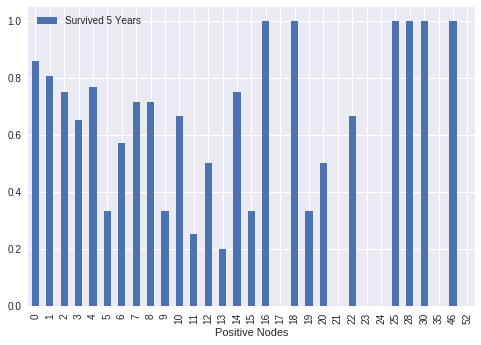

In [28]:
pd.pivot_table(df,values='Survived 5 Years',
               index='Positive Nodes').plot.bar()

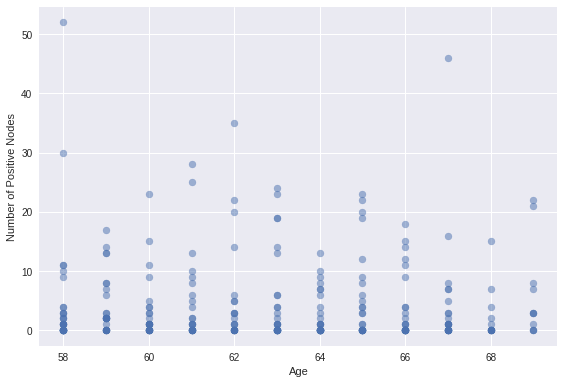

In [52]:
fig, ax = plt.subplots()

ax.set_xlabel('Age')
ax.set_ylabel('Number of Positive Nodes')

ax.scatter(df['Age'], df['Positive Nodes'], alpha=0.5)

ax.grid(True)
fig.tight_layout()

plt.show()

In [53]:
df5yes = df[df['Survived 5 Years'] == 1]
df5no = df[df['Survived 5 Years'] == 0]

df5yes_mean = df5yes['Positive Nodes'].mean()
df5yno_mean = df5no['Positive Nodes'].mean()
print ("Mean number of positive nodes for persons who survived more than five years is:", df5yes_mean)
print ("Mean number of positive nodes for persons who did not survive five years is:", df5yno_mean)
print ("Ratio of these:", df5yes_mean / df5yno_mean)

Mean number of positive nodes for persons who survived more than five years is: 2.7911111111111113
Mean number of positive nodes for persons who did not survive five years is: 7.45679012345679
Ratio of these: 0.3743046357615894


In [59]:
df_many_nodes = df[df['Positive Nodes'] > 15]

print("Statistics for those with more than 15 Positive Nodes:\n")
print("Data Frame shape: ", df_many_nodes.shape)
print("Mean number of nodes", df_many_nodes['Positive Nodes'].mean())
print("Mean survival", df_many_nodes['Survived 5 Years'].mean())
print("\nCorrelation Statistics:\n", df_many_nodes.corr())

print("\nTable Data:")
df_many_nodes

Statistics for those with more than 15 Positive Nodes:

Data Frame shape:  (22, 4)
Mean number of nodes 24.727272727272727
Mean survival 0.45454545454545453

Correlation Statistics:
                    Year of Operation       Age  Positive Nodes  \
Year of Operation           1.000000  0.074102       -0.085474   
Age                         0.074102  1.000000       -0.290243   
Positive Nodes             -0.085474 -0.290243        1.000000   
Survived 5 Years            0.083725  0.170785       -0.013177   

                   Survived 5 Years  
Year of Operation          0.083725  
Age                        0.170785  
Positive Nodes            -0.013177  
Survived 5 Years           1.000000  

Table Data:


,Year of Operation,Age,Positive Nodes,Survived 5 Years
9,1934,58,30,1
24,1938,69,21,0
43,1941,60,23,0
59,1942,62,20,1
62,1943,58,52,0
75,1944,63,19,0
79,1944,67,16,1
92,1946,65,20,0
96,1947,63,23,0
160,1953,63,24,0


Statistics for those with more than 15 Positive Nodes:

Data Frame shape:  (284, 4)
Mean number of nodes 2.4225352112676055
Mean survival 0.7570422535211268

Correlation Statistics:
                    Year of Operation       Age  Positive Nodes  \
Year of Operation           1.000000  0.091471       -0.084309   
Age                         0.091471  1.000000       -0.023395   
Positive Nodes             -0.084309 -0.023395        1.000000   
Survived 5 Years           -0.084463 -0.001600       -0.307726   

                   Survived 5 Years  
Year of Operation         -0.084463  
Age                       -0.001600  
Positive Nodes            -0.307726  
Survived 5 Years           1.000000  

Table Data:


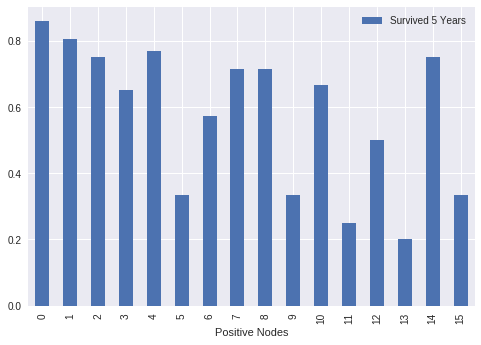

In [60]:
df_fewer_nodes = df[df['Positive Nodes'] < 16]

print("Statistics for those with more than 15 Positive Nodes:\n")
print("Data Frame shape: ", df_fewer_nodes.shape)
print("Mean number of nodes", df_fewer_nodes['Positive Nodes'].mean())
print("Mean survival", df_fewer_nodes['Survived 5 Years'].mean())
print("\nCorrelation Statistics:\n", df_fewer_nodes.corr())

print("\nTable Data:")
pd.pivot_table(df_fewer_nodes, values='Survived 5 Years',
               index='Positive Nodes').plot.bar()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

 ==>> The data is somehwat noisy. The best I can say is that those who survived 5 years or more had around a third (37% to be precise) of the number of positive nodes on average as those who didn't.
- What is at least one feature that looks to have a negative relationship with survival?

 ==>> There's somehwat of a negative correlation (-0.286768) between number of positive nodes and the chances of surviving five years or longer. BUT: There appear to be some outliers that interfere with drawing strong conclusions: For those with more than 15 positive nodes, the chances of surviving more than five years are almost fifty(!) percent - 45.45% is the precise figure. In fact, person 174, who had 46 positive nodes, survived more than five years. For this group the correlation between number of positive nodes and the chances of surviving five years or longer is almost zero (-0.013177)
- How are those two features related with each other, and what might that mean?

 ==>> As I said, the data is somewhat messy. The pivot table graph shows a gradual, pretty much linear, decline in the likelihood one survives more than five years as the number of positive nodes increases - until the number of positive nodes reaches 15, at which point this ceases. The aforementioned outliers preclude any significant conclusions when the number of positive nodes is greater than 15.
 
**Bottom line:** I wouldn't want to use this data to draw ANY conclusions.

**Addendum:** This is what I originall wrote. I then realized that the count of those with more than 15 positive nodes was 22, some seven percent of the whole table. So I threw these out and took a look at the remaining data, which is what's presented in the last cell. This has a slightly greater negative correlation (-0.307726) between number of positive nodes and the chances of surviving five years or longer, which as expected the pivot table chart seems to confirm. But even this data is noisy: three of the four who had 14 positive nodes survived five years or longer (cheated - counted these manually ;-)). So I continue to stand by my bottom line.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.